## Data Description

### What is a Term Deposit?

Term Deposits are one of the best investment options for people who are looking for a stable and safe return on their investments. In Term Deposits, the sum of money is kept for a fixed maturity and the depositor is not allowed to withdraw this sum till the end of the maturity period. That is why they are called as Term Deposits because they are kept up to a particular term. 
https://www.hdfcbank.com/personal/resources/learning-centre/save/term-deposit-vs-fixed-deposit

In [3]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("termdeposit_train.csv")

In [5]:
df.head(5)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [6]:
df.sample(10)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
20491,21898,40,management,married,secondary,no,569,no,no,cellular,20,aug,129,2,-1,0,unknown,no
27956,34122,70,technician,married,secondary,no,3020,no,no,telephone,30,apr,56,1,-1,0,unknown,no
17795,12820,35,admin.,single,secondary,no,0,no,yes,cellular,7,jul,480,1,-1,0,unknown,no
14749,5677,43,entrepreneur,single,tertiary,no,0,yes,no,unknown,26,may,142,3,-1,0,unknown,no
15933,6400,29,technician,single,secondary,no,156,yes,no,unknown,27,may,574,5,-1,0,unknown,no
17087,11127,51,management,married,primary,no,192,no,no,unknown,18,jun,129,3,-1,0,unknown,no
23140,34247,32,student,single,tertiary,no,1138,no,no,cellular,4,may,214,3,83,3,success,yes
19081,7168,53,blue-collar,married,primary,no,436,yes,no,unknown,29,may,154,1,-1,0,unknown,no
8567,27113,42,technician,married,secondary,no,3228,no,no,cellular,21,nov,133,1,-1,0,unknown,no
9000,21467,37,technician,single,tertiary,no,453,no,no,cellular,18,aug,129,4,-1,0,unknown,no


Observation from Data : we can see the data is mix of categorical and numerical data.  Target column is Binary classification.

In [7]:
df.shape

(31647, 18)

In [8]:
df.describe()  # it show only the desciption of the numeric data columns

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


#### List of categories in each categorical columns

In [9]:
for col in df.select_dtypes(include="object").columns:
    print("--"*50)
    print(col)
    print(df[col].unique())
    print("\n")

----------------------------------------------------------------------------------------------------
job
['admin.' 'unknown' 'services' 'management' 'technician' 'retired'
 'blue-collar' 'housemaid' 'self-employed' 'student' 'entrepreneur'
 'unemployed']


----------------------------------------------------------------------------------------------------
marital
['married' 'divorced' 'single']


----------------------------------------------------------------------------------------------------
education
['unknown' 'secondary' 'tertiary' 'primary']


----------------------------------------------------------------------------------------------------
default
['no' 'yes']


----------------------------------------------------------------------------------------------------
housing
['no' 'yes']


----------------------------------------------------------------------------------------------------
loan
['no' 'yes']


-------------------------------------------------------------------------

*** Above descriptions show the what catergories are in each columns.

In [10]:
for clm in df.columns:
    print(clm,df[clm].nunique())

ID 31647
age 76
job 12
marital 3
education 4
default 2
balance 6326
housing 2
loan 2
contact 3
day 31
month 12
duration 1454
campaign 45
pdays 509
previous 38
poutcome 4
subscribed 2


Above information show the number of unique values by columns.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


#### Observation : 

    >> Data has no mising values or null values
    >> there are only Two types of Data only Object(String/Categorical), and integer 
    
    
        

### Data Analysis

In [12]:
for i in df.columns:
    if df[i].dtypes == "object":
        print("="*25,i.upper(),"="*(100-25-len(i)))
        #print("Column = ",i,"\n")
        print(df[i].value_counts())
        print("-"*100,"\n")

========================= JOB ========================================================================
blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64
---------------------------------------------------------------------------------------------------- 

========================= MARITAL ====================================================================
married     19095
single       8922
divorced     3630
Name: marital, dtype: int64
---------------------------------------------------------------------------------------------------- 

========================= EDUCATION ==================================================================
secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64
---------

In [13]:
df.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

### Univariet Analysis

In [14]:
df.groupby(pd.cut(df["age"],bins=[0,25,50,75,100])).size()

age
(0, 25]        923
(25, 50]     24201
(50, 75]      6336
(75, 100]      187
dtype: int64

<AxesSubplot:xlabel='age', ylabel='Count'>

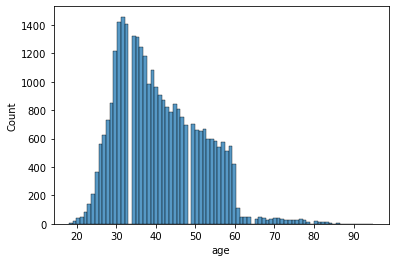

In [15]:
sns.histplot(df["age"])

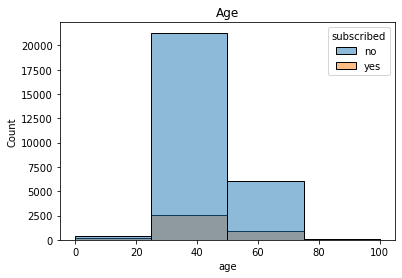

In [16]:
sns.histplot(x="age",data=df,hue="subscribed",bins=[0,25,50,75,100])
plt.title("Age")
plt.show()

Observation :
    >> Agegroup between the 25-50 are the highest number of application and only few they subsribed for term deposit

In [17]:
df["job"].value_counts().to_frame()

,job
blue-collar,6842
management,6639
technician,5307
admin.,3631
services,2903
retired,1574
self-employed,1123
entrepreneur,1008
unemployed,905
housemaid,874


Observation :  
    >> Higher number are mostly at good job roles ,like blue collar, management, techinician, admin.
    >> like some of them are unknown, not disclose what role or business they doing
    >> Unemployed, housemaid, students are very less in numbers

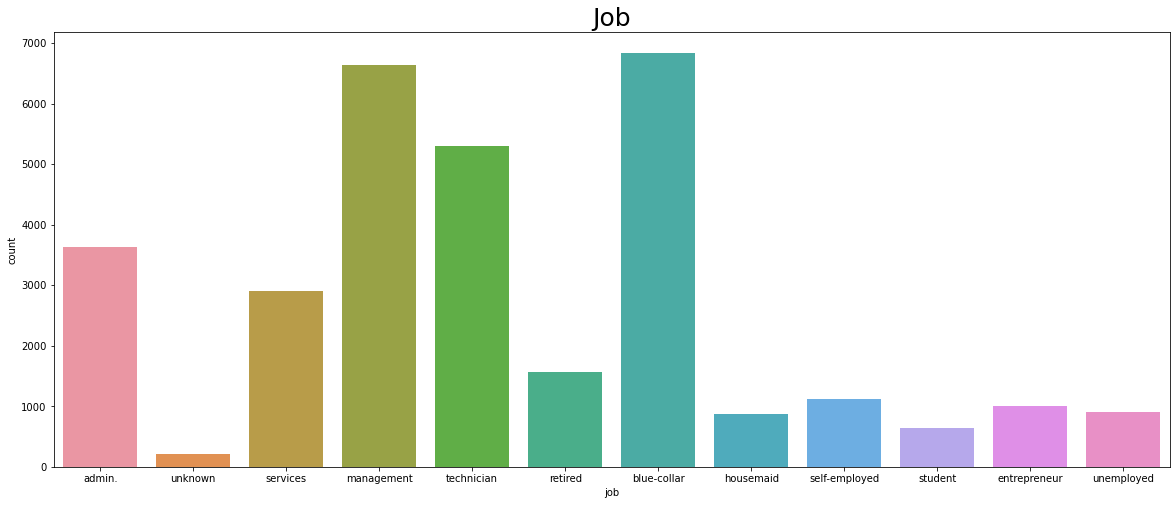

In [18]:
plt.figure(figsize=(20,8))
sns.countplot(x="job",data=df)
plt.title("Job",fontsize=25)
plt.show()

In [19]:
df["marital"].value_counts().to_frame()

,marital
married,19095
single,8922
divorced,3630


<AxesSubplot:xlabel='marital', ylabel='count'>

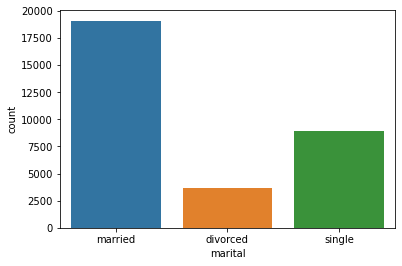

In [20]:
sns.countplot(x="marital",data=df)

********************************************************************************
           education
secondary      16224
tertiary        9301
primary         4808
unknown         1314


********************************************************************************
     default
no     31062
yes      585


********************************************************************************
     housing
yes    17584
no     14063


********************************************************************************
      loan
no   26516
yes   5131


********************************************************************************
           contact
cellular     20423
unknown       9177
telephone     2047


********************************************************************************
     month
may   9669
jul   4844
aug   4333
jun   3738
nov   2783
apr   2055
feb   1827
jan    977
oct    512
sep    410
mar    342
dec    157


*******************************************************************

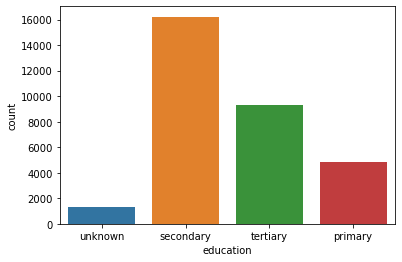

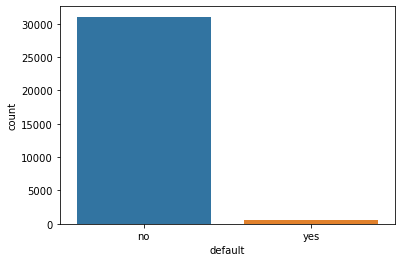

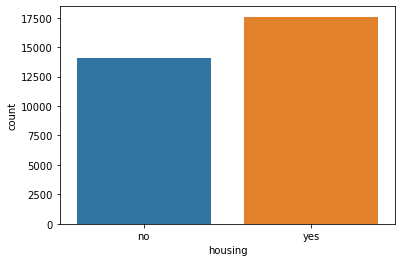

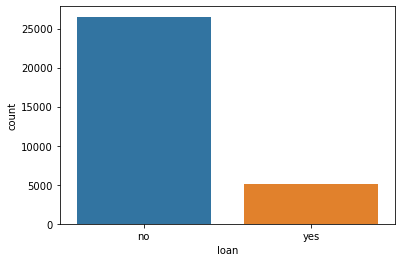

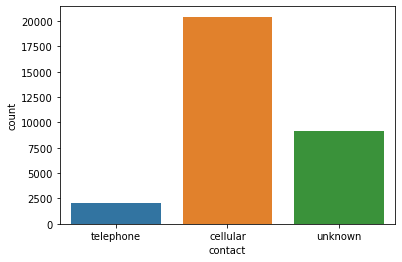

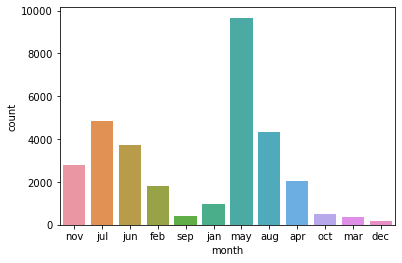

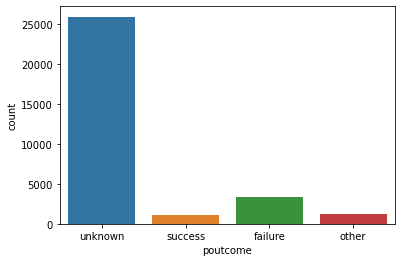

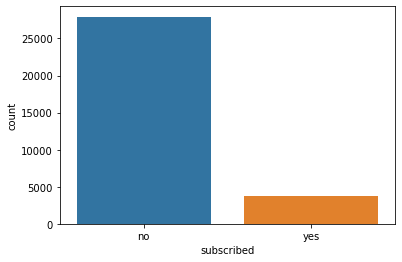

In [21]:
categoryclm = ['education', 'default','housing', 'loan', 'contact','month','poutcome','subscribed']

for i in categoryclm:
    plt.figure(i)
    print("*"*80)
    print(df[i].value_counts().to_frame())
    print("\n")
    sns.countplot(x=i,data=df)
               


Observation :
    
    1. Higher numberare from secondary Educated people
    2. Defualter are low in number.
    3. people with housing loan are higher then without the housing loan.
    4. People personal loan are vely low compare to do no have the personal loan. 
    5. Most of the people provided the Cellular contact, many of them haven't provided the number at all.
    6. High number of entry we can find in month of May compare to any months.
    7. Poutcome has high in number with unnow,  success is very less in number compare to other category.
    8. Subsribed number are very little compare to not subscribed.
    

### Relationship between the Categorical Features and Label

check the target label splipt over the categoriacal features
find out the relationship between categorical variable and dependen variable.

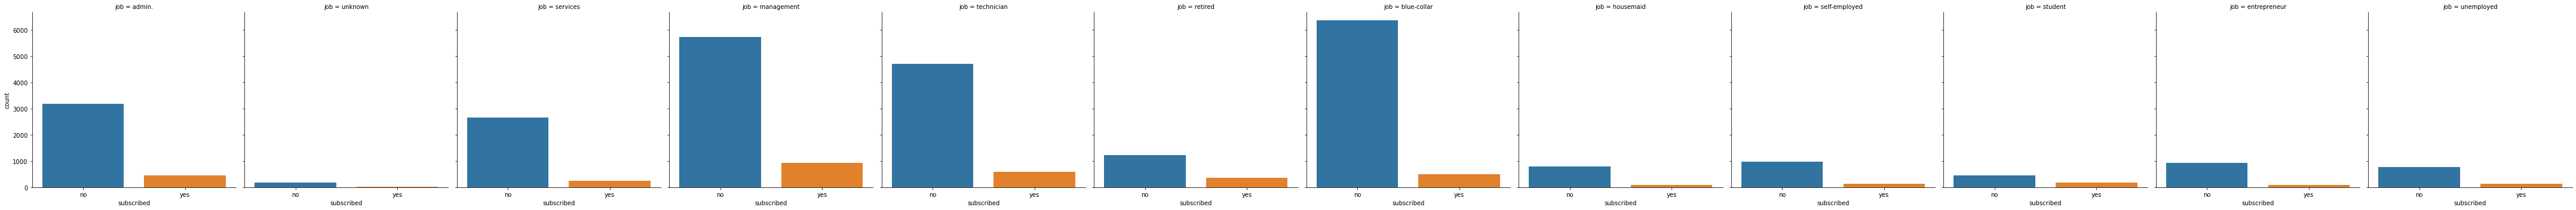

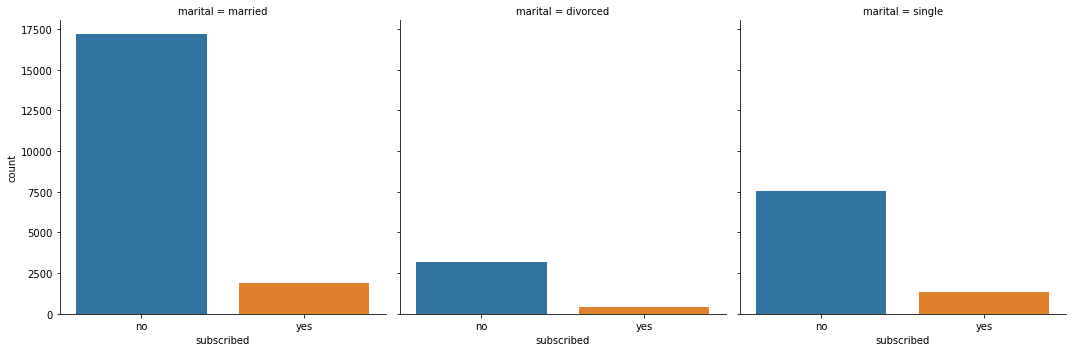

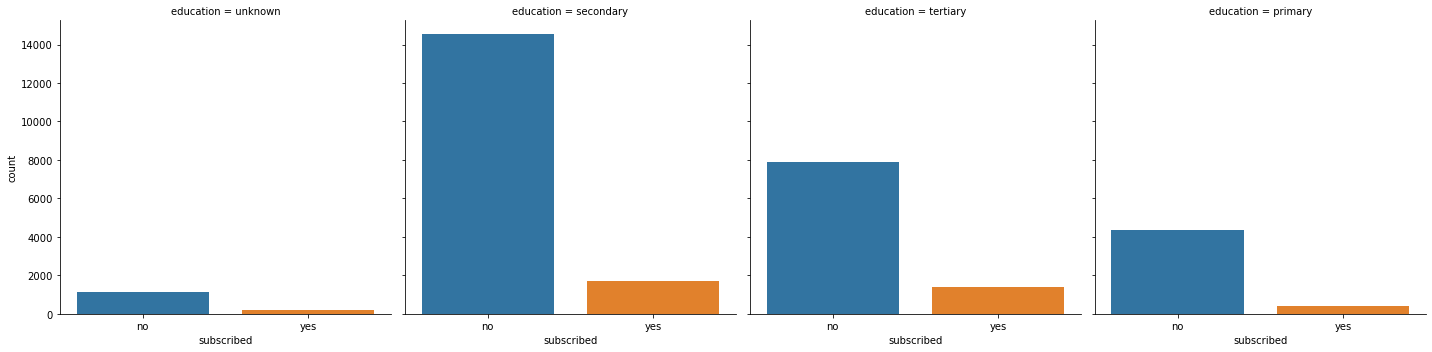

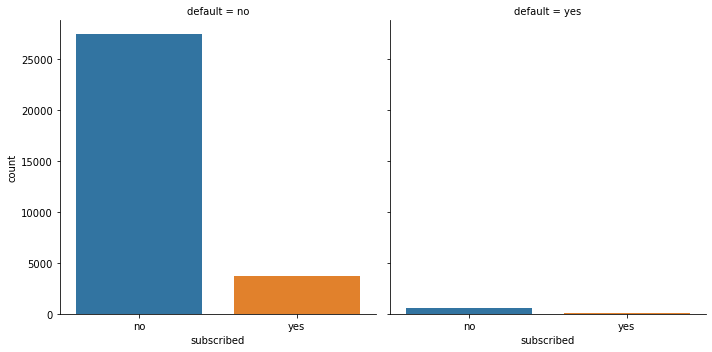

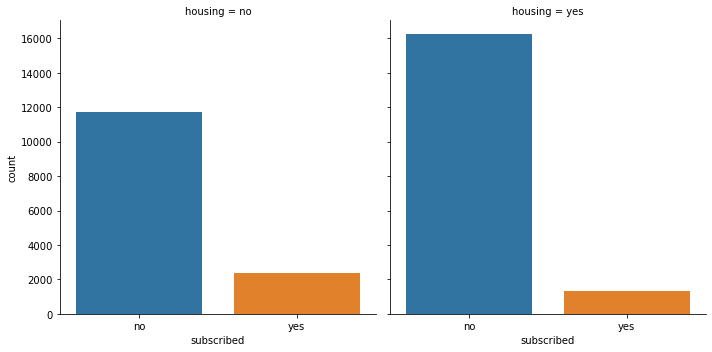

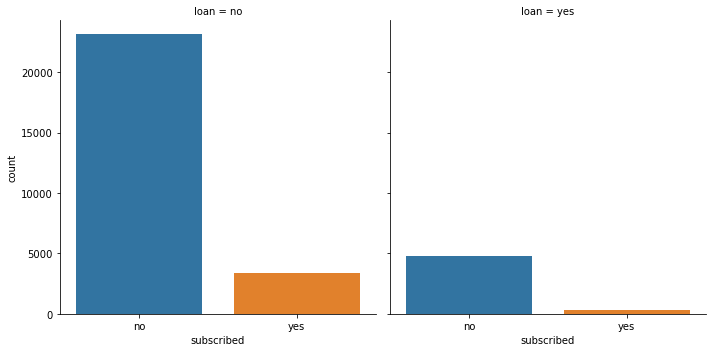

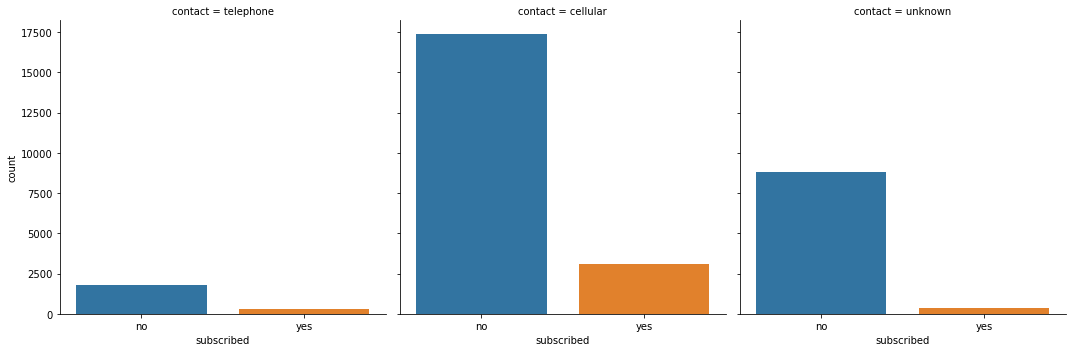

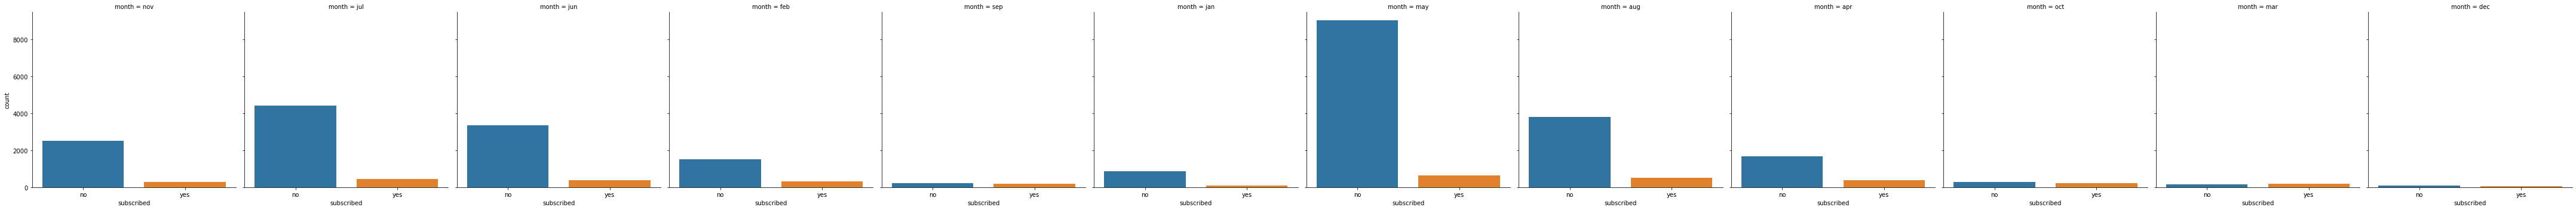

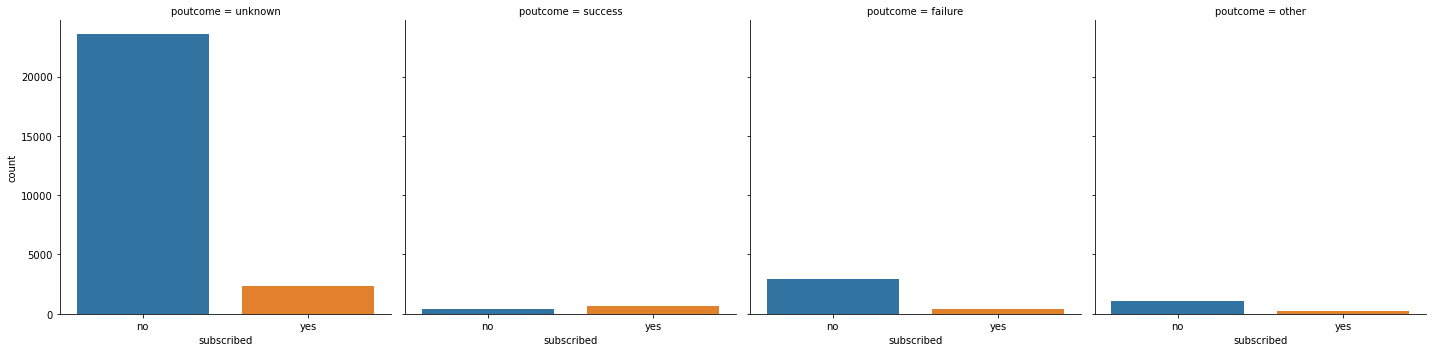

In [22]:
# Bivariate Analysis with subscibed
categoryclm = ['job','marital','education', 'default','housing', 'loan', 'contact','month','poutcome']
for clm in categoryclm:
    sns.catplot(x="subscribed",col=clm,kind="count",data=df)
plt.show()

In [23]:
categoryclm = ['job','marital','education', 'default','housing', 'loan', 'contact','month','poutcome','subscribed']
for i in categoryclm:
    print("*"*15,i,"*"*25)
    print(df.groupby(df[i])["subscribed"].value_counts())
    print("\n")

*************** job *************************
job            subscribed
admin.         no            3179
               yes            452
blue-collar    no            6353
               yes            489
entrepreneur   no             923
               yes             85
housemaid      no             795
               yes             79
management     no            5716
               yes            923
retired        no            1212
               yes            362
self-employed  no             983
               yes            140
services       no            2649
               yes            254
student        no             453
               yes            182
technician     no            4713
               yes            594
unemployed     no             776
               yes            129
unknown        no             180
               yes             26
Name: subscribed, dtype: int64


*************** marital *************************
marital   subscribed
divorced

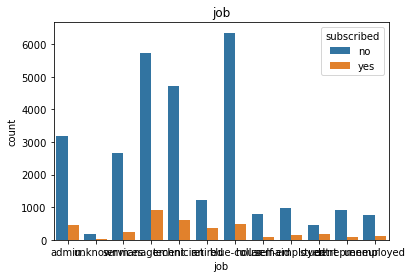

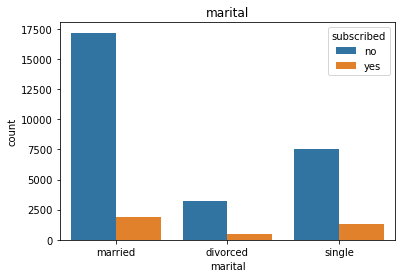

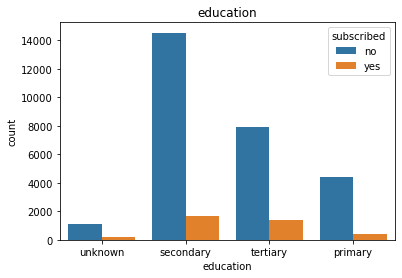

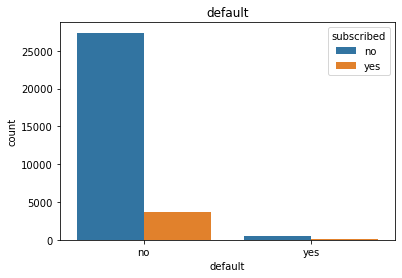

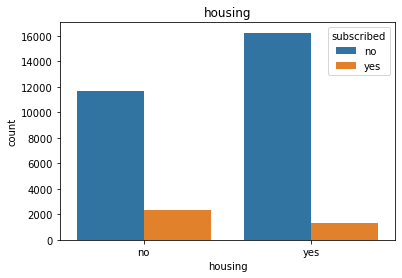

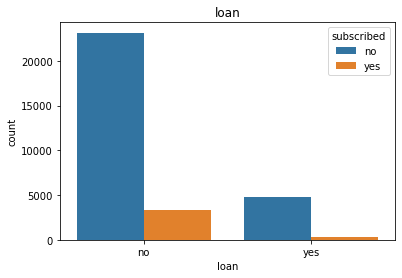

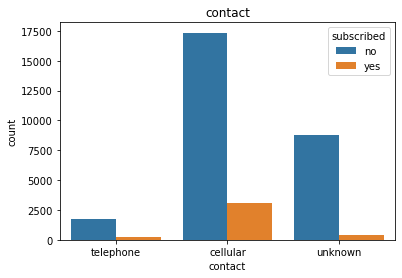

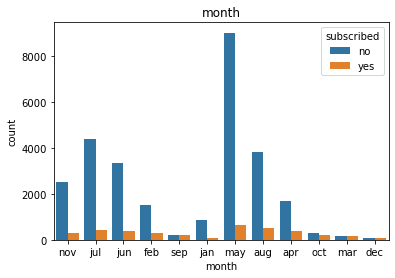

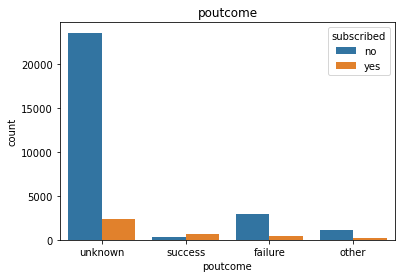

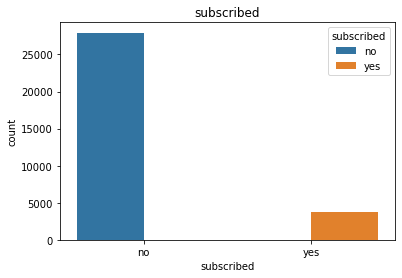

In [24]:
categoryclm = ['job','marital','education', 'default','housing', 'loan', 'contact','month','poutcome','subscribed']
for i in categoryclm:
    plt.figure(i)
    sns.countplot(x=i,data=df,hue="subscribed")
    plt.title(i)

####  Observation 
    >> retired client has high interest on deposit
    >> client who has housing loan seems to be not interested much on deposit
    >> if pre compagin outcome that is poutcome = sucess then, there is hgih chance of client to show interest on deposit
    >> in month of march, december, october september show high interest to deposit
    >> in month of may, records are too high client, interest ratio is very less

In [25]:
df.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

### ID columns Dropped , as its irrelvant for model 

In [26]:
df.drop("ID",axis=1,inplace=True)

In [27]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


### Numerical columns analysis

In [28]:
numeric_clm = [i for i in df.columns if ((df[i].dtypes !="O") & (i not in ["subscribed"]))]
print("Numeric columns :",numeric_clm)

df[numeric_clm].head()

Numeric columns : ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


,age,balance,day,duration,campaign,pdays,previous
0,56,1933,19,44,2,-1,0
1,31,3,20,91,2,-1,0
2,27,891,18,240,1,-1,0
3,57,3287,22,867,1,84,3
4,31,119,4,380,1,-1,0


Observation  : There are 7 Numerical features

### Find discrete Numerical Features

In [29]:
discrete_clm = [i for i in numeric_clm if len(df[i].unique())<25]
print("discreate variable count {}".format(len(discrete_clm)))

discreate variable count 0


### Distribution of Continous Numerical Features

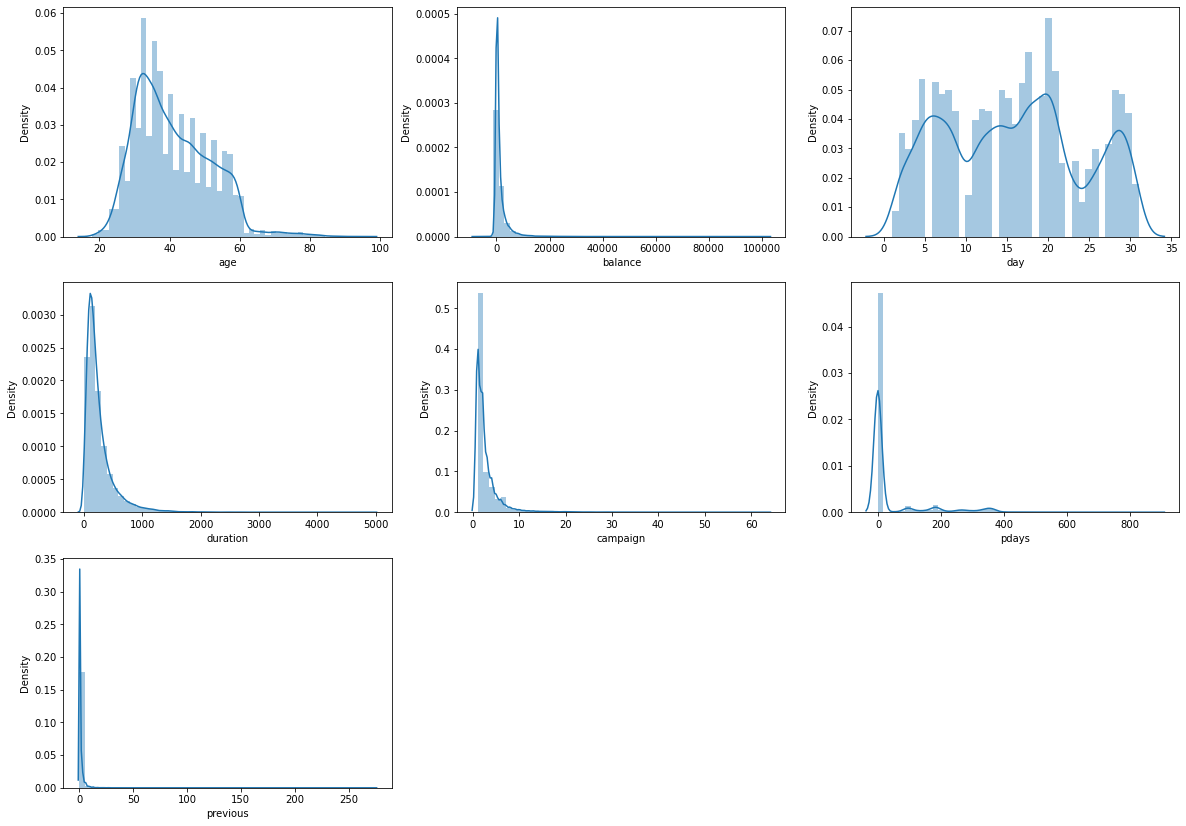

In [30]:
plt.figure(figsize=(20,60),facecolor= "white")
plotnumber=1
for i in numeric_clm:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(df[i])
    plt.xlabel(i)
    plotnumber+=1
plt.show()

#### Observation
        >> age,days distributed normally
        >> balance, duration, compaign, pdays and previous heavely skewed towards left 

### Relation between numeric features and labels

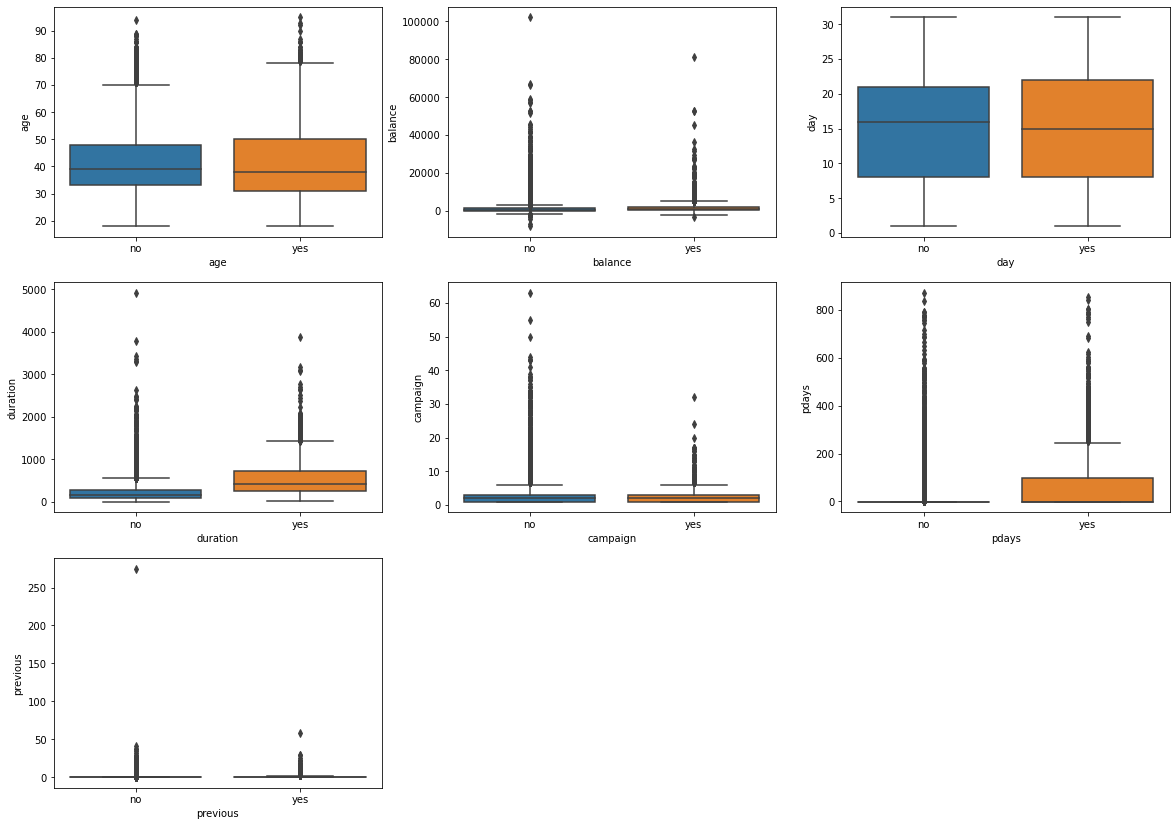

In [31]:
# boxplot to show target distribution with respect to numerical fetaures
plt.figure(figsize=(20,60),facecolor="white")
plotnumber = 1

for i in numeric_clm:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x="subscribed",y=df[i],data=df)
    plt.xlabel(i)
    plotnumber +=1
plt.show()

Observation  : 
    >> client shows interest on deposit who had discussion for longer duration
    >> we can notice that apart from day rest of features have outliers

### Find Outliers in numberical features

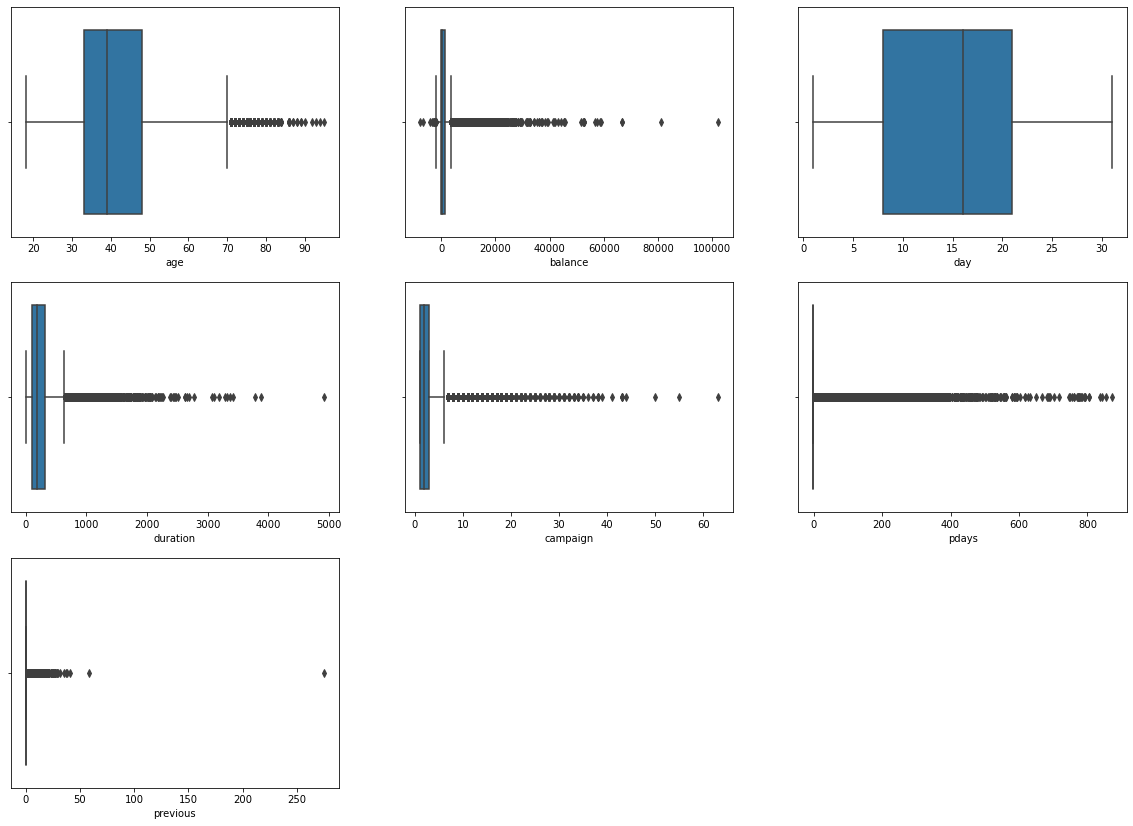

In [32]:
plt.figure(figsize= (20,60),facecolor="white")
plotnumber = 1

for i in numeric_clm:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(df[i])
    plt.xlabel(i)
    plotnumber+=1
plt.show()

Observation  : Outliers are present in  age,balance, duration,compaign, pdays, and previous

### Correlation between the numerical columns

<AxesSubplot:>

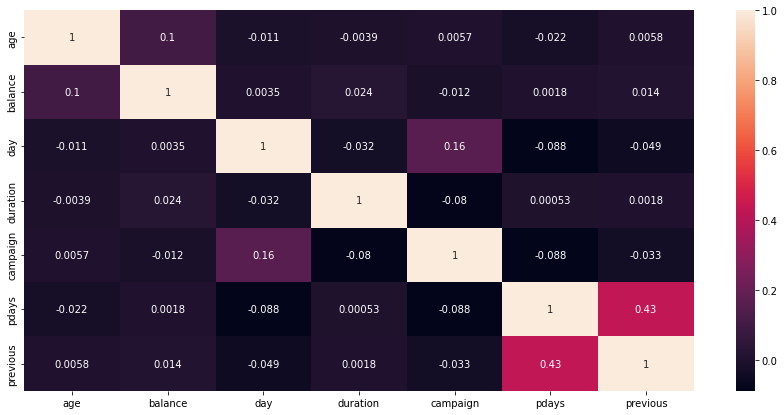

In [33]:
cor_mat = df.corr()
fig= plt.figure(figsize=(15,7))
sns.heatmap(cor_mat,annot=True)

Observation : 
    >> No features are correlated with other features

### checking the data is balance or not based on Target values

     subscribed
no        27932
yes        3715


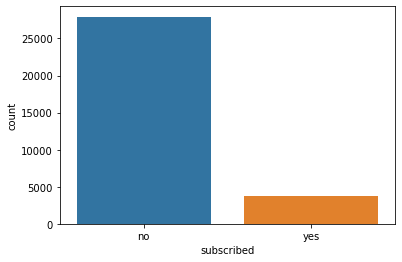

In [34]:
print(df["subscribed"].value_counts().to_frame())
sns.countplot(x="subscribed",data=df)
plt.show()

data is not balance 

### As per the EDA 

        >> No Missing value
        >> no feature found with one value
        >> outliers found in age,balance,duration,compaign, pdays and previous features

In [40]:
df1 = df.copy()

In [41]:
df1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [42]:
df1.shape

(31647, 17)

In [43]:
df.shape

(31647, 17)

### Features Enginerring

In [44]:
df1.groupby(["subscribed","default"]).size().to_frame()

0
subscribed default       
no         no       27388
           yes        544
yes        no        3674
           yes         41

In [45]:
# removed default and contact columns

df1.drop(["default","contact"],axis=1,inplace=True)

In [46]:
df1.groupby(["subscribed","pdays"]).size().to_frame()

0
subscribed pdays       
no         -1     23553
            1         6
            2        24
            4         1
            5         7
...                 ...
yes         792       1
            804       1
            805       1
            842       1
            854       1

[804 rows x 1 columns]

In [47]:
# as we can see from above data , around 40% of the date has -1 value, so we will drop this columns too
df1.drop(["pdays"],axis=1,inplace=True)

In [48]:
#outliers in feature age
df1.groupby("age",sort=True)["age"].count()


age
18     8
19    22
20    39
21    48
22    86
      ..
90     1
92     1
93     1
94     1
95     1
Name: age, Length: 76, dtype: int64

In [49]:
# outliers in feature balance
df1.groupby(["subscribed","balance"],sort=True)["balance"].count()

subscribed  balance
no          -8019      1
            -6847      1
            -4057      1
            -3372      1
            -2712      1
                      ..
yes          32685     1
             36252     1
             45248     1
             52587     2
             81204     1
Name: balance, Length: 7969, dtype: int64

In [50]:
# Duration features - outliers
df1.groupby(["subscribed","duration"],sort=True)["duration"].count()

subscribed  duration
no          0            1
            2            3
            3            3
            4           11
            5           20
                        ..
yes         2775         1
            3076         1
            3102         1
            3183         1
            3881         1
Name: duration, Length: 2381, dtype: int64

In [51]:
# Compaign features - outliers
df.groupby(["subscribed","campaign"],sort=True)["campaign"].count()

subscribed  campaign
no          1           10486
            2            7792
            3            3439
            4            2213
            5            1147
                        ...  
yes         16              2
            17              6
            20              1
            24              1
            32              1
Name: campaign, Length: 65, dtype: int64

## Lable Encoding for caterogrical columns

In [52]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in df1.columns:
    if df1[i].dtypes == "object":
        df1[i] = le.fit_transform(df1[i])
        
        

In [53]:
df1.head()

,age,job,marital,education,balance,housing,loan,day,month,duration,campaign,previous,poutcome,subscribed
0,56,0,1,3,1933,0,0,19,9,44,2,0,3,0
1,31,11,1,1,3,0,0,20,5,91,2,0,3,0
2,27,7,1,1,891,1,0,18,5,240,1,0,3,0
3,57,4,0,2,3287,0,0,22,6,867,1,3,2,1
4,31,9,1,1,119,1,0,4,3,380,1,0,3,0


##  Splitting the Database features and label columns

In [54]:
x = df1.iloc[:,:-1]
y = df1.iloc[:,-1:]

print("x", x.shape)
print("y", y.shape)

x (31647, 13)
y (31647, 1)


In [55]:
y.head()

,subscribed
0,0
1,0
2,0
3,1
4,0


In [56]:
x.head()

,age,job,marital,education,balance,housing,loan,day,month,duration,campaign,previous,poutcome
0,56,0,1,3,1933,0,0,19,9,44,2,0,3
1,31,11,1,1,3,0,0,20,5,91,2,0,3
2,27,7,1,1,891,1,0,18,5,240,1,0,3
3,57,4,0,2,3287,0,0,22,6,867,1,3,2
4,31,9,1,1,119,1,0,4,3,380,1,0,3


In [57]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
age,31647.0,40.957247,10.625134,18.0,33.0,39.0,48.0,95.0
job,31647.0,4.332923,3.271868,0.0,1.0,4.0,7.0,11.0
marital,31647.0,1.167220,0.607186,0.0,1.0,1.0,2.0,2.0
education,31647.0,1.225013,0.749195,0.0,1.0,1.0,2.0,3.0
balance,31647.0,1363.890258,3028.304293,-8019.0,73.0,450.0,1431.0,102127.0
housing,31647.0,0.555629,0.496904,0.0,0.0,1.0,1.0,1.0
loan,31647.0,0.162132,0.368578,0.0,0.0,0.0,0.0,1.0
day,31647.0,15.835466,8.337097,1.0,8.0,16.0,21.0,31.0
month,31647.0,5.533131,3.004247,0.0,3.0,6.0,8.0,11.0
duration,31647.0,258.113534,257.118973,0.0,104.0,180.0,318.5,4918.0


Observation  : 
    
        >>Balance mean value is much higher then median value but that is obivious for a reason and contribution towards the term deposit
        >>age columns mean and median  has not much difference
        

<AxesSubplot:>

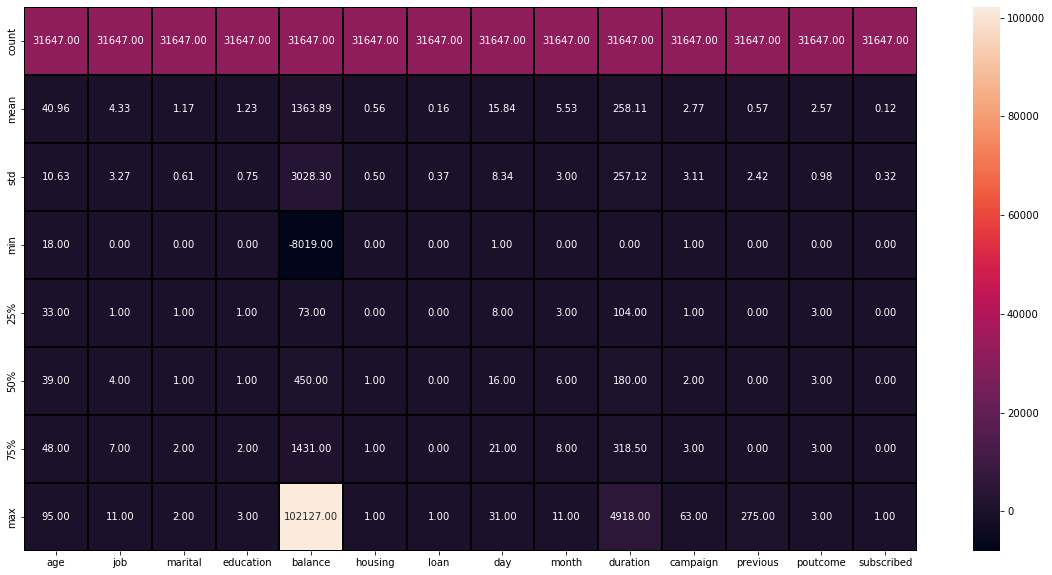

In [58]:
plt.figure(figsize = (20,10))
sns.heatmap(df1.describe(),annot=True,linewidth=0.1,linecolor="black",fmt=".2f")

In [59]:
df1.corr()["subscribed"].sort_values()

housing      -0.141092
poutcome     -0.080895
loan         -0.072266
campaign     -0.070607
day          -0.029600
month        -0.028088
age           0.024538
job           0.038921
marital       0.046043
balance       0.050807
education     0.066051
previous      0.088081
duration      0.389838
subscribed    1.000000
Name: subscribed, dtype: float64

Observation  : No strong correlation between the features to target columns.

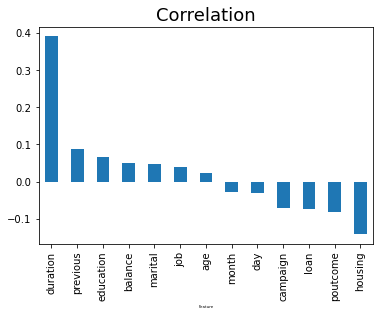

In [60]:
df1.corr()["subscribed"].sort_values(ascending=False).drop(["subscribed"]).plot(kind="bar")
plt.xlabel("Feature",fontsize=4)
plt.title("Correlation",fontsize=18)
plt.show()

In [61]:
df1.skew()

age            0.681607
job            0.264817
marital       -0.100071
education      0.199441
balance        7.995696
housing       -0.223918
loan           1.833474
day            0.087185
month         -0.486498
duration       3.199766
campaign       4.873935
previous      49.302348
poutcome      -1.996421
subscribed     2.377445
dtype: float64

Observation  : skewness is present in balance,compaign,previous,poutcome,duration,loan

# Removing Outliers

In [62]:
from scipy.stats import zscore
import numpy as np
z = np.abs(zscore(x))
z.shape

(31647, 13)

In [63]:
threshold = 3
print(np.where(z>3))

(array([   21,    26,   134, ..., 31622, 31645, 31646], dtype=int64), array([10,  4, 10, ...,  0, 11,  9], dtype=int64))


In [64]:
x = x[(z<3).all(axis=1)]
x.shape

(29243, 13)

In [65]:
y = y[(z<3).all(axis=1)]
y.shape

(29243, 1)

### Data Loss

In [66]:
percentageofDL = (df1.shape[0]-x.shape[0])/df1.shape[0]*100
print(percentageofDL)


7.596296647391538


Data Loss % are 7.59% which is accepatable range. 

# Tranformation method for remvoe a skewness from data

In [67]:
from sklearn.preprocessing import power_transform
x = power_transform(x,method="yeo-johnson")

In [68]:
x.shape

(29243, 13)

In [69]:
print(x)

[[ 1.42585316 -1.60151221 -0.29017491 ...  0.17969708 -0.45658963
   0.45420459]
 [-0.96440742  1.63901444 -0.29017491 ...  0.17969708 -0.45658963
   0.45420459]
 [-1.52061598  0.86017121 -0.29017491 ... -1.10112145 -0.45658963
   0.45420459]
 ...
 [-1.23307705  0.10644841  1.37771358 ...  0.17969708 -0.45658963
   0.45420459]
 [ 1.20299267  0.10644841 -1.89723861 ...  0.17969708 -0.45658963
   0.45420459]
 [-0.83641076  0.10644841  1.37771358 ...  0.80592991 -0.45658963
   0.45420459]]


# Scaling

In [70]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[ 1.42585316, -1.60151221, -0.29017491, ...,  0.17969708,
        -0.45658963,  0.45420459],
       [-0.96440742,  1.63901444, -0.29017491, ...,  0.17969708,
        -0.45658963,  0.45420459],
       [-1.52061598,  0.86017121, -0.29017491, ..., -1.10112145,
        -0.45658963,  0.45420459],
       ...,
       [-1.23307705,  0.10644841,  1.37771358, ...,  0.17969708,
        -0.45658963,  0.45420459],
       [ 1.20299267,  0.10644841, -1.89723861, ...,  0.17969708,
        -0.45658963,  0.45420459],
       [-0.83641076,  0.10644841,  1.37771358, ...,  0.80592991,
        -0.45658963,  0.45420459]])

# Oversampling the Data

In [71]:
print(y.shape)
y.value_counts()

(29243, 1)


subscribed
0             26208
1              3035
dtype: int64

Observation  :  we can see that target column data is not balance, so we will apply Smote technique to make data balance

In [72]:
# Oversampling the data
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x,y = sm.fit_resample(x,y)

In [73]:
y.value_counts()

subscribed
0             26208
1             26208
dtype: int64

Now the Data is Balance

# Since the outcome has only two variable we will use the binary classification model.

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

### Splitting the DataFrame

In [77]:
maxaccu = 0 
rstate = 0
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)

    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i,"The Model performs well")
        print("At Random State : ",i)
        print("Training Accuracy is : ",accuracy_score(y_train,pred_train)*100)
        print("Testing Accuracy is : ",accuracy_score(y_test,pred_test)*100)
        print("Difference of Train and Test :",(accuracy_score(y_train,pred_train)*100)-(accuracy_score(y_test,pred_test)*100))
        print("\n")
        if accuracy_score(y_test,pred_test)*100 > maxaccu:
            maxaccu = accuracy_score(y_test,pred_test)*100
            rstate = i


At random state 6 The Model performs well
At Random State :  6
Training Accuracy is :  81.36029762472575
Testing Accuracy is :  81.40022892025944
Difference of Train and Test : -0.039931295533691014


At random state 21 The Model performs well
At Random State :  21
Training Accuracy is :  81.39368501383191
Testing Accuracy is :  81.39069057611599
Difference of Train and Test : 0.0029944377159267788


At random state 34 The Model performs well
At Random State :  34
Training Accuracy is :  81.4270724029381
Testing Accuracy is :  81.41930560854635
Difference of Train and Test : 0.0077667943917418825


At random state 41 The Model performs well
At Random State :  41
Training Accuracy is :  81.36506725174092
Testing Accuracy is :  81.40022892025944
Difference of Train and Test : -0.0351616685185121


At random state 48 The Model performs well
At Random State :  48
Training Accuracy is :  81.41514833540016
Testing Accuracy is :  81.42884395268982
Difference of Train and Test : -0.01369561728

Observation  :  Below is best test and train accuracy score with lowest diffrence.

===========================================

at random state 21 The Model performs well
At Random State :  21
Training Accuracy is :  81.39368501383191
Testing Accuracy is :  81.39069057611599
Difference of Train and Test : 0.0029944377159267788

In [78]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=21,test_size=0.20)

In [79]:
lr.fit(x_train,y_train)
pred_train = lr.predict(x_train)
pred_test = lr.predict(x_test)
print("Logistic Regression Score\n")
print("Training Accuracy is : ",accuracy_score(y_train,pred_train)*100)
print("Testing Accuracy is : ",accuracy_score(y_test,pred_test)*100)
    

Logistic Regression Score

Training Accuracy is :  81.39368501383191
Testing Accuracy is :  81.39069057611599


In [80]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      5217
           1       0.81      0.82      0.82      5267

    accuracy                           0.81     10484
   macro avg       0.81      0.81      0.81     10484
weighted avg       0.81      0.81      0.81     10484



# Cross Validation for Logistic Regression

In [81]:
pred_lr = lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lss = accuracy_score(y_test,pred_lr)
for j in range(2,100):
    lsscore = cross_val_score(lr,x,y,cv=j)
    lsc = lsscore.mean()
    print("At CV :",j)
    print("Cross Validation Score is : ",lsc*100)
    print("Accuracy Score is : ",lss*100)
    print("Differnce : ",(lsc*100)-(lss*100))
    print("\n")

At CV : 2
Cross Validation Score is :  81.3549297924298
Accuracy Score is :  81.39069057611599
Differnce :  -0.03576078368618596


At CV : 3
Cross Validation Score is :  81.39308608058609
Accuracy Score is :  81.39069057611599
Differnce :  0.002395504470101173


At CV : 4
Cross Validation Score is :  81.4083485958486
Accuracy Score is :  81.39069057611599
Differnce :  0.0176580197326075


At CV : 5
Cross Validation Score is :  81.36448255843301
Accuracy Score is :  81.39069057611599
Differnce :  -0.026208017682975537


At CV : 6
Cross Validation Score is :  81.40453296703298
Accuracy Score is :  81.39069057611599
Differnce :  0.013842390916991576


At CV : 7
Cross Validation Score is :  81.37210012210012
Accuracy Score is :  81.39069057611599
Differnce :  -0.018590454015864566


At CV : 8
Cross Validation Score is :  81.38927045177044
Accuracy Score is :  81.39069057611599
Differnce :  -0.0014201243455431722


At CV : 9
Cross Validation Score is :  81.40453296703298
Accuracy Score is :

Observation

==================================================
 #  Random state 21 - At CV : 52
At CV : 53
Cross Validation Score is :  81.39119729599112
Accuracy Score is :  81.39069057611599
Differnce :  0.000506719875133399

In [82]:
lss = accuracy_score(y_test,pred_lr)
lsscore = cross_val_score(lr,x,y,cv=52)
lsc = lsscore.mean()
print("Logistic Regression CV Score\n")
print("Cross Validation Score is : ",lsc*100)
print("Accuracy Score is : ",lss*100)
print("Differnce : ",(lsc*100)-(lss*100))
print("\n")

Logistic Regression CV Score

Cross Validation Score is :  81.38927045177044
Accuracy Score is :  81.39069057611599
Differnce :  -0.0014201243455431722




# Random Forest Classifier Model

In [83]:
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier

RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC = RFC.predict(x_test)

print("RFC Accuracy Score is : ",accuracy_score(y_test,predRFC))
print("\nConfusion Matrix :\n ",confusion_matrix(y_test,predRFC))
print("\nClassification Report :",classification_report(y_test,predRFC))

RFC Accuracy Score is :  0.9491606257153758

Confusion Matrix :
  [[4877  340]
 [ 193 5074]]

Classification Report :               precision    recall  f1-score   support

           0       0.96      0.93      0.95      5217
           1       0.94      0.96      0.95      5267

    accuracy                           0.95     10484
   macro avg       0.95      0.95      0.95     10484
weighted avg       0.95      0.95      0.95     10484



### Cross Val Score for RFC

In [79]:
cvsRFC = cross_val_score(RFC,x,y,cv=53).mean()
print(cvsRFC)
print("Differnce Accuracy and Cross Val Score is :",accuracy_score(y_test,predRFC)-cvsRFC)

0.9539262820512823
Differnce Accuracy and Cross Val Score is : -0.0028579875072151095


# Support Vector Classifier

In [84]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)
print("svc Accuracy test :",accuracy_score(y_test,predsvc))
print("\nConfusion Matrix :\n",confusion_matrix(y_test,predsvc))
print("\nClassification Report :\n",classification_report(y_test,predsvc))

svc Accuracy test : 0.8616940099198779

Confusion Matrix :
 [[4267  950]
 [ 500 4767]]

Classification Report :
               precision    recall  f1-score   support

           0       0.90      0.82      0.85      5217
           1       0.83      0.91      0.87      5267

    accuracy                           0.86     10484
   macro avg       0.86      0.86      0.86     10484
weighted avg       0.86      0.86      0.86     10484



In [ ]:
# Cross val score for SVC
cvssvc = cross_val_score(svc,x,y,cv=53).mean()
print("Cross Val Score for SVC :",cvssvc)
print("\nDiffernce between the accuracy_score and Cross val :",accuracy_score(y_test,predsvc)-cvssvc)

# Gradient Boosting Classifier

In [85]:
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB = GB.predict(x_test)
print("Accuracy Score GB :",accuracy_score(y_test,predGB))
print("\nConfusion Matrix :\n", confusion_matrix(y_test,predGB))
print("\nClassification Report :\n",classification_report(y_test,predGB))
     

Accuracy Score GB : 0.9132010682945441

Confusion Matrix :
 [[4697  520]
 [ 390 4877]]

Classification Report :
               precision    recall  f1-score   support

           0       0.92      0.90      0.91      5217
           1       0.90      0.93      0.91      5267

    accuracy                           0.91     10484
   macro avg       0.91      0.91      0.91     10484
weighted avg       0.91      0.91      0.91     10484



In [ ]:
# Cross val score for GB
csvGB = cross_val_score(GB,x,y,cv=53).mean()
print("Cross Val score :",csvGB)
print("Differnce between Accuracy and Cross validation is :",accuracy_score(y_test,predGB)-csvGB)


In [86]:
#Extra Tree Classifier Model
ET = ExtraTreesClassifier()
ET.fit(x_train,y_train)
predET = ET.predict(x_test)
print("Accuracy Score ET:",accuracy_score(y_test,predET))
print("\nConfusion Matrix : \n",confusion_matrix(y_test,predET))
print("\nClassification Report :\n",classification_report(y_test,predET))

Accuracy Score ET: 0.9642312094620374

Confusion Matrix : 
 [[4926  291]
 [  84 5183]]

Classification Report :
               precision    recall  f1-score   support

           0       0.98      0.94      0.96      5217
           1       0.95      0.98      0.97      5267

    accuracy                           0.96     10484
   macro avg       0.97      0.96      0.96     10484
weighted avg       0.96      0.96      0.96     10484



In [ ]:
# Cross Val Score for ET
csvET = cross_val_score(ET,x,y,cv=53).mean()
print("Cross Val Score :", csvET)
print("Differnce Between Accuracy and Cross Validation is :", accuracy_score(y_test,predET)-csvET)

In [ ]:
#AdaBoost Classifier Model

In [87]:
ADB = AdaBoostClassifier()
ADB.fit(x_train,y_train)
predADB=ADB.predict(x_test)
print("Ada Boost Accuracy Score :",accuracy_score(y_test,predADB))
print("\nConfusion Matrix :\n", confusion_matrix(y_test,predADB))
print("\nClassification Report :\n",classification_report(y_test,predADB))

Ada Boost Accuracy Score : 0.8760969095764976

Confusion Matrix :
 [[4565  652]
 [ 647 4620]]

Classification Report :
               precision    recall  f1-score   support

           0       0.88      0.88      0.88      5217
           1       0.88      0.88      0.88      5267

    accuracy                           0.88     10484
   macro avg       0.88      0.88      0.88     10484
weighted avg       0.88      0.88      0.88     10484



In [ ]:
# Cross validation for AdaBoost
cvsADB = cross_val_score(ADB,x,y,cv=53).mean()
print("Cross Val Score ADB : ",cvsADB)
print("Difference for Accuracy and Validation score ADB :",accuracy_score(y_test,predADB)-cvsADB)


### Accuracy Score and Cross Val Score for above models

Accuracy Score is :  81.39069057611599
RFC Accuracy Score is :  0.9491606257153758
svc Accuracy test : 0.8616940099198779
Accuracy Score GB : 0.9132010682945441
ET : Accuracy Score: 0.9642312094620374
Ada Boost Accuracy Score : 0.8760969095764976

# Hyper Parameter Testing

In [88]:
from sklearn.model_selection import GridSearchCV

parameters = {"criterion" : ["gini","entropy"],
              "random_state":[10,50,1000],
              "max_depth":[0,10,20],
              "n_jobs":[-2,-1,1],
              "n_estimators":[50,100,200,300]}

In [89]:
from seaborn.axisgrid import Grid
GCV = GridSearchCV(ExtraTreesClassifier(),parameters,cv=53)

In [ ]:
GCV.fit(x_train,y_train)

In [ ]:
GCV.best_params_

In [ ]:
Final_model = ExtraTreesClassifier(criterion="entropy",max_depth=10,n_estimators=100,n_jobs=-2,random_state=1000)
Final_model.fit(x_train,y_train)
pred = Final_model.predict(x_test)
acc = accuracy_score(y_test,pred)
print(acc*100)

# AUC ROC Curve

In [ ]:

from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds = roc_curve(pred_test,y_test)
roc_auc = auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color="darkorange",lw=10,label="Roc Curve (area = 0.2f)" % roc_auc)
plt.plot([0,1],[0,1],color="navy",lw=10,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc=("lower right"))
plt.show()

In [ ]:
from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve

disp = plot_roc_curve(ET,x_test,y_test) # ax = Axes with confusion matrix
plot_roc_curve(RFC,x_test,y_test,ax = disp.ax_)
plot_roc_curve(svc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(GB,x_test,y_test,ax=disp.ax_)
plt.legend(prop={"size":11},loc = "lower right")
plt.show()

# Model Saving

In [ ]:
import pickle
filename = "termdeposit.pkl"
pickle.dump(Final_model,open(filename,"wb"))

In [ ]:
model=pickle.load(open('termdeposit.pkl','rb'))
df = pd.read_csv('termdeposit_test.csv')
predictions=model.predict(df.drop('Race',axis=1))
print(predictions)

In [ ]:
# End of Project